In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
## Read the csv file
df = pd.read_csv(r'C:\Users\Keerthana V\Documents\Keerthana-D\Dataset\Wine_quality\wine_train.csv')

## Exploratory Data Analysis

In [3]:
df.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         3673 non-null   float64
 1   volatile.acidity      3673 non-null   float64
 2   citric.acid           3673 non-null   float64
 3   residual.sugar        3673 non-null   float64
 4   chlorides             3673 non-null   float64
 5   free.sulfur.dioxide   3673 non-null   float64
 6   total.sulfur.dioxide  3673 non-null   float64
 7   density               3673 non-null   float64
 8   pH                    3673 non-null   float64
 9   sulphates             3673 non-null   float64
 10  alcohol               3673 non-null   float64
 11  quality               3673 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 344.5 KB


In [5]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000
mean,6.854724,0.277953,0.335108,6.413613,0.045710,35.368500,138.626736,0.994026,3.189834,0.489115,10.525709,5.893820
std,0.848973,0.099913,0.123156,5.054275,0.021747,16.974746,42.641142,0.003016,0.152739,0.112433,1.243642,0.892749
min,3.800000,0.080000,0.000000,0.600000,0.012000,3.000000,9.000000,0.987110,2.720000,0.250000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991700,3.080000,0.410000,9.400000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.043000,34.000000,134.000000,0.993800,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.810000,1.010000,14.200000,9.000000


In [6]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

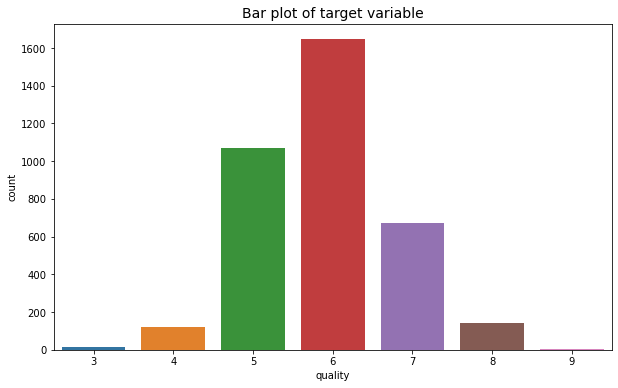

In [7]:
plt.figure(figsize=(10,6))
plt.title("Bar plot of target variable",fontdict={'fontsize':14})
sns.countplot(df['quality'])

In [8]:
## correlation matrix
pd.DataFrame(abs(df.corr()['quality']).sort_values(ascending=False))


,quality
quality,1.000000
alcohol,0.436661
density,0.306094
chlorides,0.211490
volatile.acidity,0.189077
total.sulfur.dioxide,0.179859
fixed.acidity,0.112055
pH,0.090143
residual.sugar,0.089946
sulphates,0.035366


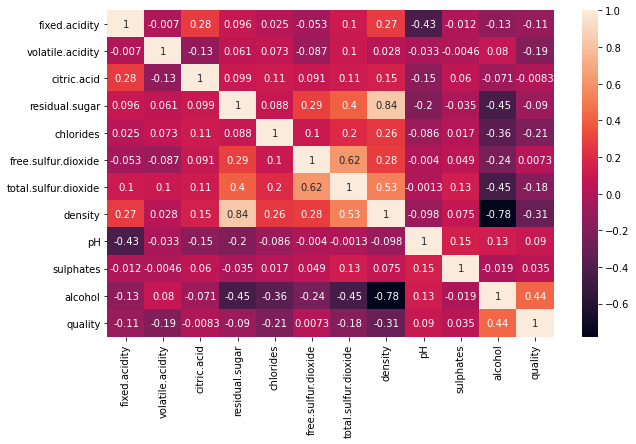

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [10]:
quality = df['quality']
category = []
for num in quality:
    if num < 5:
        category.append('bad')
    elif num >6:
        category.append('good')
    else:
        category.append('normal')

In [11]:
# convert the target variable to categorical type

category = pd.DataFrame(data = category,columns = ['columns'])
df = pd.concat([df,category],axis =1)
df.drop(columns = 'quality',axis = 1,inplace=True)

In [12]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,columns
0,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.2,normal
1,8.2,0.420,0.29,4.1,0.030,31.0,100.0,0.99110,3.00,0.32,12.8,good
2,6.4,0.220,0.32,7.2,0.028,15.0,83.0,0.99300,3.13,0.55,10.9,good
3,5.0,0.350,0.25,7.8,0.031,24.0,116.0,0.99241,3.39,0.40,11.3,normal
4,7.4,0.300,0.30,5.2,0.053,45.0,163.0,0.99410,3.12,0.45,10.3,normal


In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 3)

In [16]:
print(X_train)

[[ 8.    0.26  0.28 ...  3.13  0.5  10.  ]
 [ 6.8   0.24  0.37 ...  3.2   0.5   9.4 ]
 [ 7.5   0.26  0.26 ...  3.17  0.39  8.8 ]
 ...
 [ 7.    0.35  0.3  ...  3.4   0.42 11.4 ]
 [ 6.6   0.16  0.25 ...  3.16  0.38 10.  ]
 [ 8.3   0.33  0.43 ...  3.38  0.47  9.3 ]]


## KNN

In [17]:
pipe_knn_pca = Pipeline([('pca',PCA(n_components=5)),
                         ('clf',KNeighborsClassifier())])

grid_params_knn_pca = \
dict(pca__n_components = range(1,11),clf__n_neighbors = range(1,10))
gs_knn_pca = GridSearchCV(estimator = pipe_knn_pca,param_grid = grid_params_knn_pca,scoring='accuracy')
gs_knn_pca.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=5)),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': range(1, 10),
                         'pca__n_components': range(1, 11)},
             scoring='accuracy')

In [18]:
gs_knn_pca.best_score_

0.7238419402364853

## Decision Tree Classifier

In [19]:
pipe_dt_pca = Pipeline([('scl',StandardScaler()),
                       ('pca',PCA()),
                       ('clf',DecisionTreeClassifier())])

In [20]:
param_grid = [{
    'clf__min_samples_split':[2,3,5],
    'clf__max_depth':[8,9,10,15,16,17],
    'clf__criterion':['gini','entropy'],
    'clf__splitter':['best'],
    'clf__class_weight':['balanced',None]
}]

gs_dt_pca = GridSearchCV(estimator=pipe_dt_pca,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
gs_dt_pca.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('pca', PCA()),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'clf__class_weight': ['balanced', None],
                          'clf__criterion': ['gini', 'entropy'],
                          'clf__max_depth': [8, 9, 10, 15, 16, 17],
                          'clf__min_samples_split': [2, 3, 5],
                          'clf__splitter': ['best']}],
             scoring='accuracy', verbose=1)

In [21]:
gs_dt_pca.best_score_

0.7573011975369272

## RandomForest Classifier

In [22]:
clf = RandomForestClassifier(random_state=3,oob_score=True)
param_dist = {'n_estimators':[50,100,150,200,250],
             'min_samples_leaf':[1,2,4]}
rf_gs = GridSearchCV(clf,param_grid = param_dist,scoring='accuracy',cv=5)
rf_gs.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=3),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='accuracy')

In [23]:
rf_gs.best_score_

0.8226360923274527

In [25]:
importances = rf_gs.best_estimator_.feature_importances_

In [27]:
df.columns[:-1]

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [29]:
feature_importances = pd.DataFrame(importances,index = df.columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

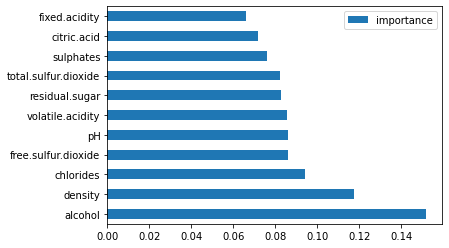

In [30]:
feature_importances.plot(kind='barh')

## SVM

In [31]:
skf = StratifiedKFold(n_splits=4)
pipe_svm = Pipeline([('clf',svm.SVC())])

In [32]:
grid_params=dict(clf__C=[0.1,0.3,1,3,10],
                clf__gamma=[0.1,0.3,1.3,3,10],
                clf__kernel=['rbf','sigmoid'])

In [33]:
svm_gs = GridSearchCV(estimator=pipe_svm,
                     param_grid = grid_params,
                     scoring='accuracy',
                     cv = skf)

svm_gs.fit(X_train,Y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('clf', SVC())]),
             param_grid={'clf__C': [0.1, 0.3, 1, 3, 10],
                         'clf__gamma': [0.1, 0.3, 1.3, 3, 10],
                         'clf__kernel': ['rbf', 'sigmoid']},
             scoring='accuracy')

In [34]:
svm_gs.best_score_

0.7864632539255728

## RandomForest Gives best result

In [35]:
pred_rf = rf_gs.predict(X_test)
print(classification_report(Y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.06      0.11        50
           1       0.69      0.55      0.61       228
           2       0.84      0.93      0.88       824

    accuracy                           0.81      1102
   macro avg       0.76      0.51      0.54      1102
weighted avg       0.80      0.81      0.79      1102



In [36]:
print("The RF accuracy on Test Data is %s"%accuracy_score(Y_test,pred_rf))

The RF accuracy on Test Data is 0.8139745916515426


In [37]:
confusion_matrix(y_pred = pred_rf,y_true = Y_test)

array([[  3,   1,  46],
       [  0, 125, 103],
       [  1,  54, 769]], dtype=int64)